#  **Cat Family Classification**

The goal of this project is to build a cat family classification model using convolutional neural networks (CNN) and the Fast.ai library. This model will be able to accurately classify between lion, tiger, cougar, caracal, cheetah and ocelot images. We will use transfer learning with a pre-trained ResNet34 architecture as our base for training the model on our dataset of cats from each species in order to achieve high accuracy results quickly and efficiently.

<img src="https://i.pinimg.com/originals/f7/cd/7b/f7cd7b593b7d91aa720e39c9fbd1e892.jpg">

## **Steps**

1.   Import Required libraries
1.   Download The Data
2.   Verify The Data 
2.   Make `DataLoaders`
1.   Make Learner
2.   Train The Model 
2.   Interpretation

###**1. Import Required libraries**

In [1]:
#Run once per session
!pip install fastai -q --upgrade

In [2]:
!pip install bing-image-downloader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from fastai.vision.all import *

In [4]:
from fastcore.foundation import L
from fastcore.xtras import Path # @patch'd properties to the Pathlib module

from fastai.callback.fp16 import to_fp16
from fastai.callback.schedule import fit_one_cycle, lr_find 

from fastai.data.block import CategoryBlock, DataBlock
from fastai.data.transforms import get_image_files, Normalize, RandomSplitter, parent_label

from fastai.interpret import ClassificationInterpretation
from fastai.learner import Learner # imports @patch'd properties to Learner including `save`, `load`, `freeze`, and `unfreeze`

from fastai.vision.augment import aug_transforms, RandomResizedCrop
from fastai.vision.core import imagenet_stats
from fastai.vision.data import ImageBlock
from fastai.vision.learner import cnn_learner
from fastai.vision.utils import download_images, verify_images

In [5]:
from bing_image_downloader import downloader

###2.**Download The Data** 

Now that we have imported our libraries, it is time to download our data using the Bing library. 

`Bing Image Downloader` in Python is a Python library that allows users to download images from Bing search engine. It provides an easy-to-use interface for searching and downloading images based on keywords or phrases. The library uses the Bing Search API to retrieve image results and then downloads them to the local machine. This library can be useful for developers who need to download large numbers of images for data analysis, machine learning, or other purposes.

And here is <a href="https://libraries.io/pypi/bing-image-downloader"> bing image downloader website </a> 

In [6]:
# Make directory
!mkdir Cat_Family

In [7]:
# grap cheetah images and put them in 'cheetah_animal' folder
downloader.download('cheetah_animal' , limit = 70 , output_dir='Cat_Family')

[%] Downloading Images to /content/Cat_Family/cheetah_animal


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://1.bp.blogspot.com/-s3rKgPpsrq8/Tvx_HDljtdI/AAAAAAAAEDY/dOcQxz75hI0/s1600/cheetahs_1646474i4.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://upload.wikimedia.org/wikipedia/commons/0/09/TheCheethcat.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://3.bp.blogspot.com/-5DL0D_N9nAQ/T5oZHuMS6LI/AAAAAAAAA8c/SCs_xuPwNvU/s1600/animals+big+cats+Female-Cheetah+hunting++masaimara+amboseli+serengeti+tsavo+on-the-Lookout+endangered+animal+picture.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://1.bp.blogspot.com/-_BqqJlJ755Q/T_UzsDP1-VI/AAAAAAAAMU4/WC2_5HloyHk/s1600/Cheetah.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://4.bp.blogspot.com/-mx-EPYcxRxY/T_U0BH8K6cI/AAAAAAAAMVg/fNoStERdhoQ/s1600/Cheetah6.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://2.bp.blogspot.com/-

In [8]:
downloader.download('tiger_animal' , limit = 70 , output_dir='Cat_Family')

[%] Downloading Images to /content/Cat_Family/tiger_animal


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://4.bp.blogspot.com/-CKOjr2gjZvw/UOJx0c5DsiI/AAAAAAAABfs/QI1ENNk2UDo/s1600/Tigers,+4.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://4.bp.blogspot.com/-hTsjXMC76vA/TwwiR5D4MAI/AAAAAAAAAdI/mJcnzF3G-gM/s1600/the_most_beautiful_animal_1600x1200.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://images4.fanpop.com/image/photos/20200000/Tigers-animals-20238015-2493-1983.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://4.bp.blogspot.com/-z-p1lXHAhk4/T-AXkLnaU2I/AAAAAAAALtA/VVe6iQV0-Y0/s1600/Bengal+Tiger4.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.hdnicewallpapers.com/Walls/Big/Tiger/Animal_Tiger_HD_Wallpaper.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://4.bp.blogspot.com/-Urk3zVyy0uM/T4aF0vmjeqI/AAAAAAAAFJM/YlUGfX8Foe8/s1600/bengal-tiger_1600x1200.jpg
[%] 

In [9]:
downloader.download('lion_animal' , limit = 70 , output_dir='Cat_Family')

[%] Downloading Images to /content/Cat_Family/lion_animal


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://4.bp.blogspot.com/-xJxeP-SiSSQ/UWk0iUK-SUI/AAAAAAAAAFs/XeF6ccjodcQ/s1600/Lion-King-Of-Jungle.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://2.bp.blogspot.com/-k1LTVxtn0Ls/UA5xzZv7o9I/AAAAAAAANNE/7Wg33Qnv-Aw/s1600/Lion5%2B-%2BCopy.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://1.bp.blogspot.com/-cXF2mBVmuGo/UBJ1MSc6J7I/AAAAAAAAAV8/4PkpeH2Wpcc/s1600/The-best-top-desktop-lion-wallpapers-hd-lion-wallpaper-1.jpeg
[%] File Downloaded !

[%] Downloading Image #4 from http://www.digital-images.net/Images/WildAnimalPark/Lion_HS7149LGsigned.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://1.bp.blogspot.com/-WXJwsmoLe0I/TuegJlugVyI/AAAAAAAACxY/lUyvrdpFEEM/s1600/21.jpeg
[%] File Downloaded !

[%] Downloading Image #6 from http://2.bp.blogspot.com/-xUhDTeNaeCY/UWk0hyEf0rI/AAAAAAAAAFk/kp79USw5ubE/s16

In [10]:
downloader.download('cougar_animal' , limit = 70 , output_dir='Cat_Family')

[%] Downloading Images to /content/Cat_Family/cougar_animal


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://3.bp.blogspot.com/-K7Qle94UYDI/UDxIqx9o_fI/AAAAAAAAPJY/R7sbIshzSk0/s1600/Cougar4.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://1.bp.blogspot.com/-UbDlP0qQJCI/UDxIcRbx6xI/AAAAAAAAPJA/DbnUvpMvYqI/s1600/Cougar.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://2.bp.blogspot.com/-rrwi6VnHQBE/TzilGpYCOyI/AAAAAAAAFbI/_e0n1XCNIGY/s1600/Cougar-08.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://1.bp.blogspot.com/-zCuKMqZ5zkA/UDxIxURWyeI/AAAAAAAAPJo/QkghsyD7Pcg/s1600/Cougar6.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://www.hdnicewallpapers.com/Walls/Big/Other Animals/Animal_Cougar_5K_Wallpaper.jpg
[!] Issue getting: https://www.hdnicewallpapers.com/Walls/Big/Other Animals/Animal_Cougar_5K_Wallpaper.jpg
[!] Error:: URL can't contain control characters. '/Walls/Big/Other Animals

In [11]:
downloader.download('caracal_animal' , limit = 70 , output_dir='Cat_Family')

[%] Downloading Images to /content/Cat_Family/caracal_animal


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://3.bp.blogspot.com/-UjbvvphRSB0/T3abZ-y0xzI/AAAAAAAAGPk/FMv-nt6OvHY/s1600/Caracal-06.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://images5.alphacoders.com/689/689152.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.jukani.co.za/img.php?image=https://jukani.co.za/userfiles/images/Jukani-2020/Caracal2.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://animals.sandiegozoo.org/sites/default/files/2016-10/animals_hero_caracal.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://i.pinimg.com/originals/72/ff/d2/72ffd2640bf385c27525626454f1b3b0.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i.pinimg.com/originals/04/89/39/04893990201f624b384cf916c7905fc2.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://i.natgeofe.com/k/6554443b-a293-471f-aa60-bf

In [12]:
downloader.download('ocelot_animal' , limit = 70 , output_dir='Cat_Family')

[%] Downloading Images to /content/Cat_Family/ocelot_animal


[!!]Indexing page: 1

[%] Indexed 35 Images on Page 1.


[%] Downloading Image #1 from http://4.bp.blogspot.com/-04uqKoT3k2o/UBKbiQF8ftI/AAAAAAAANR8/aEs1IDRlwGM/s1600/Ocelot.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://1.bp.blogspot.com/-4ys-cJUGFhY/UVeVp8bAFZI/AAAAAAAACn0/5NrMaMSxRlM/s1600/Ocelot+Animal+Pic.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://3.bp.blogspot.com/-q3xkCwovvyU/UVeVwhK7DvI/AAAAAAAACoY/guYmcKOPwcQ/s1600/Ocelot+Animal.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://animals.sandiegozoo.org/sites/default/files/2016-09/animals_hero_ocelot.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://2.bp.blogspot.com/-SbI_v3OnsRg/WKdVvxmaExI/AAAAAAAAAcs/HuCGSVBDXagsbVcVU4LjkcZ5Rbd4mQo-wCLcB/s1600/Ocelot.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://someinterestingfacts.net/wp-content/uploads/2016/04/Ocelot.jpg
[%] File Downloaded !



###3. **Verify Images**

In fast.ai, we need to verify images to ensure that they are correctly labeled and that they are appropriate for the intended use. Verifying images is an important step in the data preparation process, as it helps to prevent errors and inaccuracies in the training of machine learning models so we can do this by using `verify_images` method.

In FastAI, the `verify_images()` function is used to verify the validity of images in a given directory. It checks for any corrupt or invalid images and removes them from the directory. This function is particularly useful when working with large datasets that may contain a significant number of invalid images. By using `verify_images()`, you can ensure that your dataset only contains valid images, which can improve the accuracy of your machine learning models.

In [13]:
# names of our labels
classes = ['cheetah_animal', 'tiger_animal', 'lion_animal','cougar_animal','caracal_animal','ocelot_animal']

In [14]:
path = Path('Cat_Family')
path.mkdir(parents=True, exist_ok=True)

In [15]:
imgs = L()
for n in classes:
  print(n)
  path_n = path/n
  imgs += verify_images(path_n.ls())

cheetah_animal
tiger_animal
lion_animal
cougar_animal
caracal_animal
ocelot_animal


In [16]:
imgs

(#0) []

###**4. Make `DataLoaders`**
Now that we have our datasets ready, let's build our data loaders and show some images.

In `fast.ai`, data loaders are a set of classes that help in loading and transforming data for machine learning models. They provide an easy-to-use interface for loading data from various sources such as CSV files, image folders, and databases. Data loaders also allow for efficient loading of data in batches, which is essential for training deep learning models on large datasets. Additionally, they provide functionality for data augmentation and normalization, which can improve the performance of machine learning models.

In [17]:
cat_family = DataBlock(blocks=(ImageBlock, CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(0.2),
                  get_y=parent_label,
                  item_tfms=RandomResizedCrop(460),
                  batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)])

In [18]:
dls = cat_family.dataloaders(path,  bs=32)

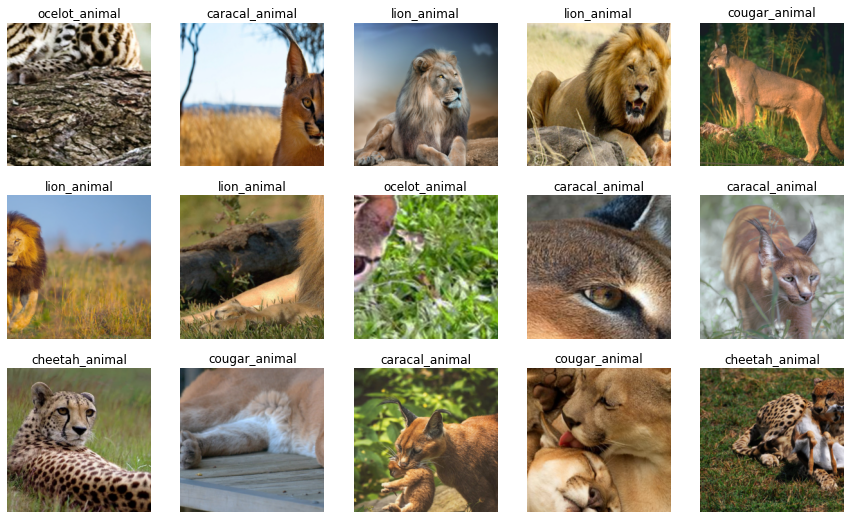

In [25]:
dls.show_batch(max_n=15)

### **5. Make Learner**
Now that we have created our data loaders, we can build our vision learner to use it for training our model. The vision learner will be responsible for taking the data from the data loader and using it to train a model. So in this tast we are going to use ResNet34.

In fast.ai, ResNet34 is a convolutional neural network architecture that consists of 34 layers. It is a variant of the ResNet (short for "Residual Network") family of models that was introduced by Microsoft Research in 2015. ResNet34 has been pre-trained on the ImageNet dataset and can be fine-tuned for various computer vision tasks such as image classification, object detection, and segmentation.

<img src = "https://www.researchgate.net/publication/341158371/figure/download/fig6/AS:887822487658501@1588684784807/a-Identity-shortcut-connections-bThe-structure-of-ResNet-34.png">

In [26]:
learn = vision_learner(dls, resnet34, pretrained=True, metrics=error_rate).to_fp16()

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

### **6. Train The Model**

Let's train our model using our vision learner that we created. We can use the vision learner to input images and labels, and then train the model to recognize patterns in the data.

In [29]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.287282,0.208391,0.059524,00:18
1,0.369981,0.231774,0.083333,00:19
2,0.386988,0.205379,0.071429,00:18
3,0.353104,0.191129,0.059524,00:20


In [30]:
learn.save('stage-1')

Path('models/stage-1.pth')

### **7. Interpretation**

Using the `ClassificationInterpretation` class from fast.ai, we can easily view the results of our classification model. This class provides us with a variety of visualizations and metrics to help us understand how our model is performing. We can view the confusion matrix, which shows us how many samples were correctly classified and how many were misclassified. We can also view the top losses, which shows us the samples that were most difficult for our model to classify correctly.

In [32]:
learn.load('stage-1');

In [33]:
interp = ClassificationInterpretation.from_learner(learn)

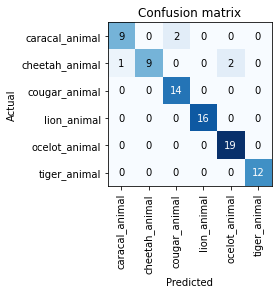

In [34]:
interp.plot_confusion_matrix()

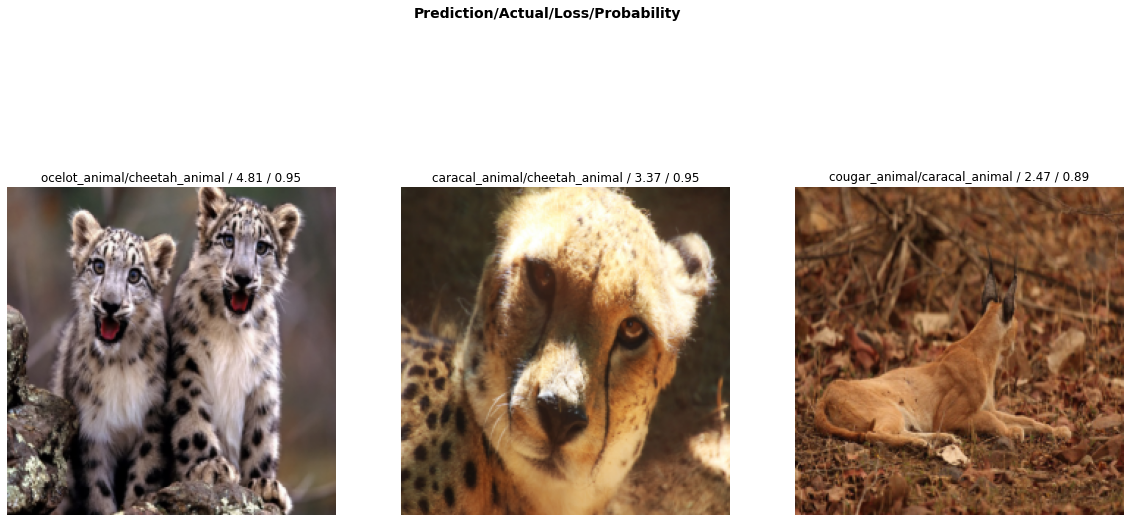

In [35]:
interp.plot_top_losses(3, figsize=(20,10))